In [41]:
#library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

In [42]:
print(tf.__version__)
print(keras.__version__)

2.4.0-rc0
2.4.0


In [43]:
## 디렉토리 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')

In [44]:
# image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [45]:
# image file들을 읽어서 channel이 3이 아닌 image는 삭제
# grayscale(1), rgba(4) 등 channel이 맞지 않다.
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    image_mode = image.mode
    if image_mode != 'RGB':
        print(image_file, image_mode)
        image = np.asarray(image)
        print(image.shape)
        os.remove(image_path)

In [46]:
# image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [47]:
image_files[:10]

['pug_52.jpg',
 'basset_hound_112.jpg',
 'Siamese_193.jpg',
 'shiba_inu_122.jpg',
 'Siamese_53.jpg',
 'Birman_167.jpg',
 'leonberger_6.jpg',
 'Siamese_47.jpg',
 'shiba_inu_136.jpg',
 'saint_bernard_139.jpg']

In [48]:
# file name 에서 class 가져오기
class_list = set()
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

37


In [49]:
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [50]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [51]:
# train, validation 디렉토리 설정
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [52]:
# image file 정렬
image_files.sort()
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [53]:
cnt = 0
previous_class =""
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    if class_name == previous_class:
        cnt += 1
    else:
        cnt = 1
    if cnt <= 160:
        cpath = train_dir
    else:
        cpath = val_dir
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, cpath)
    previous_class = class_name

In [54]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [55]:
print(len(train_images), len(val_dir))

5920 86


In [56]:
train_images[:10]

['pug_52.jpg',
 'basset_hound_112.jpg',
 'Siamese_193.jpg',
 'shiba_inu_122.jpg',
 'Siamese_53.jpg',
 'Birman_167.jpg',
 'leonberger_6.jpg',
 'Siamese_47.jpg',
 'shiba_inu_136.jpg',
 'saint_bernard_139.jpg']

In [57]:
val_images[:10]

['wheaten_terrier_75.jpg',
 'pug_91.jpg',
 'Siamese_90.jpg',
 'Siamese_84.jpg',
 'pug_85.jpg',
 'shiba_inu_80.jpg',
 'pomeranian_65.jpg',
 'pomeranian_71.jpg',
 'shiba_inu_94.jpg',
 'Bengal_66.jpg']

### TFRecord File 만들기

In [58]:
IMG_SIZE = 224

In [59]:
# TRFecord 저장할 디렉토리와 file 경로 설정
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')

In [60]:
# TRFecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [61]:
# 출처 : https://www.tensorflow.org/tutorials/load_data/tfrecord
# The following functions can be used to convert a value to a type compatible
# with tf.train.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [62]:
# Training data로 tfrecord 만들기
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
    train_path = os.path.join(train_dir, train_file)
    image = Image.open(train_path)
    image = image.resize((IMG_SIZE,IMG_SIZE))
    bimage = image.tobytes()
    
    file_name = os.path.splitext(train_file)[0] # Bangal_101
    class_name = re.sub('_\d+', '', file_name) # 정규식으로 _숫자제거
    class_num = class2idx[class_name]
    
    example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
    writer_train.write(example.SerializeToString())
    n_train += 1

writer_train.close()
print(n_train)

5920


In [63]:
# Validation data로 tfrecord 만들기
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
    val_path = os.path.join(val_dir, val_file)
    image = Image.open(val_path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    bimage = image.tobytes()

    file_name = os.path.splitext(val_file)[0] # Bangal_101
    class_name = re.sub('_\d+', '', file_name)  # 정규식으로 _숫자제거
    class_num = class2idx[class_name]

    example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
    }))
    writer_val.write(example.SerializeToString())
    n_val += 1

writer_val.close()
print(n_val)

1458


## Classification

In [64]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 10
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.00008
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH)) # np.ceil 나머지 남는 데이터까지 validation에 사용할수 있게 만듬

In [65]:
# tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)              
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)    
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    # Normalize
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)

    return image, label

In [66]:
# train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [67]:
# validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

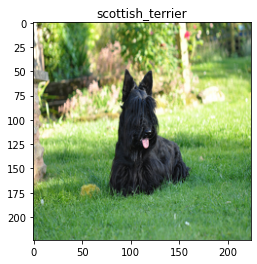

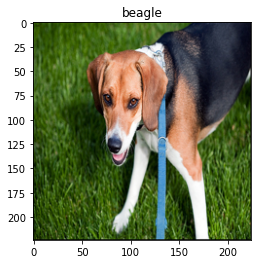

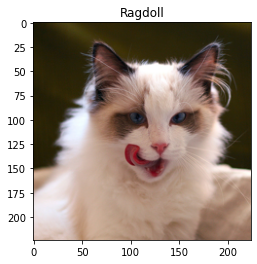

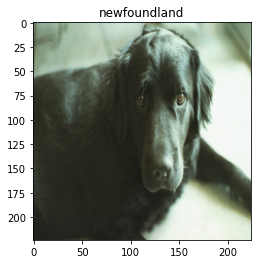

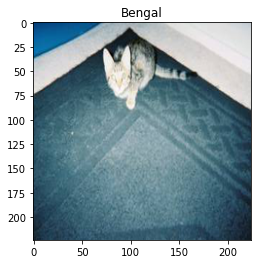

In [68]:
# image 보기
for image, label in train_dataset.take(5):
    plt.imshow(image[0])
    title = class_list[label[0].numpy()]
    plt.title(title)
    plt.show()

In [29]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    return model

In [30]:
# Create model, compile & summary
model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [31]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/10
148/148 [==============================] - 77s 512ms/step - loss: 3.6107 - accuracy: 0.0335 - val_loss: 3.4881 - val_accuracy: 0.0658
Epoch 2/10
148/148 [==============================] - 77s 514ms/step - loss: 3.4587 - accuracy: 0.0838 - val_loss: 3.1789 - val_accuracy: 0.1447
Epoch 3/10
148/148 [==============================] - 77s 515ms/step - loss: 3.4466 - accuracy: 0.1185 - val_loss: 3.0796 - val_accuracy: 0.1578
Epoch 4/10
148/148 [==============================] - 77s 512ms/step - loss: 3.3701 - accuracy: 0.1511 - val_loss: 2.9973 - val_accuracy: 0.1886
Epoch 5/10
148/148 [==============================] - 77s 514ms/step - loss: 3.5391 - accuracy: 0.1569 - val_loss: 3.3048 - val_accuracy: 0.1804
Epoch 6/10
148/148 [==============================] - 77s 512ms/step - loss: 3.9529 - accuracy: 0.1862 - val_loss: 3.3783 - val_accuracy: 0.2071
Epoch 7/10
148/148 [==============================] - 77s 514ms/step - loss: 4.1687 - accuracy: 0.2102 - val_loss: 4.4861 - val_ac

In [32]:
# Sequential API를 사용하여 model 구성
def create_bn_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', 
                                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    
    return model

In [33]:
## Create model, compile & summary
model = create_bn_model()

## learning rate scheduing
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*5,
                                                          decay_rate=0.5, #5epoch마다 0.5씩 줄여라
                                                          staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 64)     

In [34]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/10
148/148 [==============================] - 195s 1s/step - loss: 3.5231 - accuracy: 0.1038 - val_loss: nan - val_accuracy: 0.0274
Epoch 2/10
148/148 [==============================] - 96s 639ms/step - loss: 1.6653 - accuracy: 0.6080 - val_loss: nan - val_accuracy: 0.0302
Epoch 3/10
148/148 [==============================] - 96s 638ms/step - loss: 0.7293 - accuracy: 0.9038 - val_loss: nan - val_accuracy: 0.0953
Epoch 4/10
148/148 [==============================] - 96s 639ms/step - loss: 0.2732 - accuracy: 0.9916 - val_loss: nan - val_accuracy: 0.2250
Epoch 5/10
148/148 [==============================] - 97s 646ms/step - loss: 0.1158 - accuracy: 0.9998 - val_loss: nan - val_accuracy: 0.2682
Epoch 6/10
148/148 [==============================] - 98s 654ms/step - loss: 0.0598 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.2812
Epoch 7/10
148/148 [==============================] - 96s 641ms/step - loss: 0.0490 - accuracy: 1.0000 - val_loss: nan - val_accuracy: 0.2901
Epoch 8/

### val_loss: nan
- val_loss: nan를 해결하기위해 learningrate를 줄여보고 optimizer바꿔봤는데 해결안됨..